In [1]:
import numpy as np
import pandas as pd

from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
df = pd.read_excel('data_apple.xlsx')
df['Mid'] = df[['Bid', 'Ask']].mean(axis = 1)

maturities = np.sort(df.Maturity_days.unique())
strikes = np.arange(170, 210 + 2.5, 2.5)

X, Y = np.meshgrid(strikes, maturities)
option_prices = np.empty([len(maturities), len(strikes)])

def xyz_plot(option_type):
    if option_type == 'Call':
        df_options = df[df['Option_type'] == 'Call'][['Maturity_days', 'Strike', 'Mid']]
        plot_title = 'Call prices'
        
    elif option_type == 'Put':
        df_options = df[df['Option_type'] == 'Put'][['Maturity_days', 'Strike', 'Mid']]
        plot_title = 'Put prices'
        
    for i in range(len(maturities)):
        s = df_options[df_options.Maturity_days == maturities[i]]['Strike']
        price = df_options[df_options.Maturity_days == maturities[i]]['Mid']
        f = interpolate.interp1d(s, price, bounds_error = False, fill_value = 'extrapolate')
        option_prices[i, :] = f(strikes)
        
    fig = plt.figure( figsize = (12, 8))
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X, Y, option_prices, cmap = cm.coolwarm)
    ax.set_xlabel('strikes')
    ax.set_ylabel('Maturities(days)')
    ax.set_zlabel(plot_title)
    ax.set_title(plot_title)
    table = pd.DataFrame(np.round(option_prices,3), index = maturities, columns = strikes)
    return table

[[21.27499962 18.84999084 16.54999542 14.25       12.0999999  10.07499981
   8.19999981  6.5         5.          3.70000005  2.64499998  1.81500006
   1.19        0.755       0.46499999  0.28        0.16499996]
 [21.82499695 19.61249876 17.40000057 15.37500024 13.3499999  11.54999995
   9.75        8.22500002  6.70000005  5.5         4.29999995  3.41999996
   2.53999996  1.96749997  1.39499998  1.06        0.72500002]
 [22.59999943 20.48749971 18.375      16.4375     14.5        12.76250005
  11.0250001   9.53750014  8.05000019  6.82500029  5.60000038  4.63750023
   3.67500007  2.98750001  2.29999995  1.83999997  1.38      ]
 [23.72499847 21.73749924 19.75       17.88750005 16.0250001  14.36249995
  12.69999981 11.23749995  9.7750001   8.53750014  7.30000019  6.30000007
   5.29999995  4.61249995  3.92499995  3.23749995  2.54999995]
 [24.47499943 22.51249981 20.55000019 18.7750001  17.         15.375
  13.75       12.3125     10.875       9.6624999   8.44999981  7.4124999
   6.375      

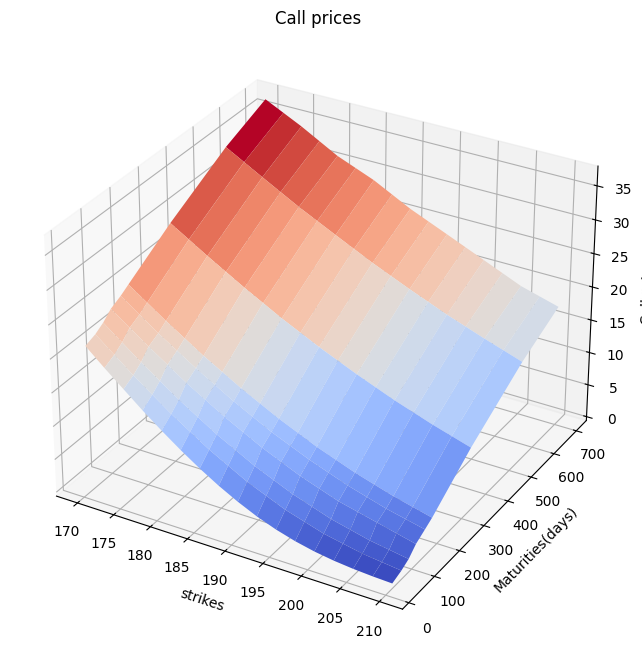

In [13]:
xyz_plot('Call')
print(option_prices)

,170.0,172.5,175.0,177.5,180.0,182.5,185.0,187.5,190.0,192.5,195.0,197.5,200.0,202.5,205.0,207.5,210.0
25,0.435,0.570,0.765,1.035,1.415,1.930,2.605,3.475,4.525,5.775,7.250,8.950,10.825,12.900,15.150,17.525,19.875
60,1.040,1.337,1.635,2.110,2.585,3.293,4.000,4.975,5.950,7.275,8.600,10.250,11.900,13.862,15.825,18.037,20.250
88,1.555,1.932,2.310,2.855,3.400,4.162,4.925,5.938,6.950,8.225,9.500,11.100,12.700,14.562,16.425,18.525,20.625
116,2.620,3.110,3.600,4.250,4.900,5.750,6.600,7.650,8.700,9.987,11.275,12.775,14.275,16.113,17.950,19.788,21.625
151,3.250,3.800,4.350,5.050,5.750,6.625,7.500,8.562,9.625,10.900,12.175,13.650,15.125,16.787,18.450,20.337,22.225
179,3.700,4.288,4.875,5.600,6.325,7.213,8.100,9.187,10.275,11.525,12.775,14.225,15.675,17.312,18.950,20.787,22.625
333,7.250,8.000,8.750,9.612,10.475,11.487,12.500,13.612,14.725,15.975,17.225,18.600,19.975,21.475,22.975,24.613,26.250
543,10.850,11.687,12.525,13.500,14.475,15.550,16.625,17.750,18.875,20.100,21.325,22.637,23.950,25.437,26.925,28.437,29.950
697,12.300,13.937,15.575,15.987,16.400,17.763,19.125,20.000,20.875,22.000,23.125,24.775,26.425,27.812,29.200,30.625,32.050


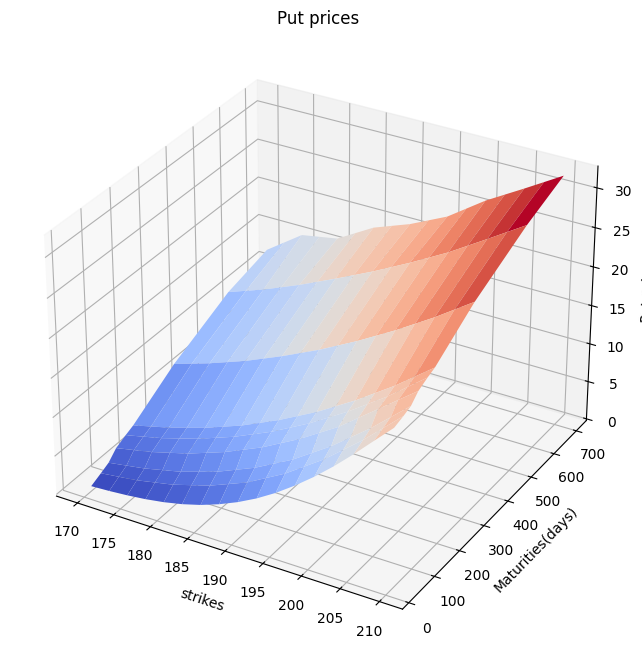

In [4]:
xyz_plot('Put')